In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_athletes = pd.read_excel('Athletes.xlsx')
df_medals = pd.read_excel('Medals.xlsx')
df_teams = pd.read_excel('Teams.xlsx')
df_gender = pd.read_excel('EntriesGender.xlsx')
df_coaches = pd.read_excel('Coaches.xlsx')
print(df_athletes)
print(df_medals)
print(df_teams)
print(df_gender)
print(df_coaches)

                        Name      NOC           Discipline
0            AALERUD Katrine   Norway         Cycling Road
1                ABAD Nestor    Spain  Artistic Gymnastics
2          ABAGNALE Giovanni    Italy               Rowing
3             ABALDE Alberto    Spain           Basketball
4              ABALDE Tamara    Spain           Basketball
...                      ...      ...                  ...
11080  ZWICKER Martin Detlef  Germany               Hockey
11081      ZWOLINSKA Klaudia   Poland         Canoe Slalom
11082           ZYKOVA Yulia      ROC             Shooting
11083      ZYUZINA Ekaterina      ROC              Sailing
11084        ZYZANSKA Sylwia   Poland              Archery

[11085 rows x 3 columns]
    Rank                    Team/NOC  Gold  Silver  Bronze  Total  \
0      1    United States of America    39      41      33    113   
1      2  People's Republic of China    38      32      18     88   
2      3                       Japan    27      14      17 

c:\Users\Kinjal\AppData\Local\Programs\Python\Python311\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
c:\Users\Kinjal\AppData\Local\Programs\Python\Python311\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


### Medal distribution by country

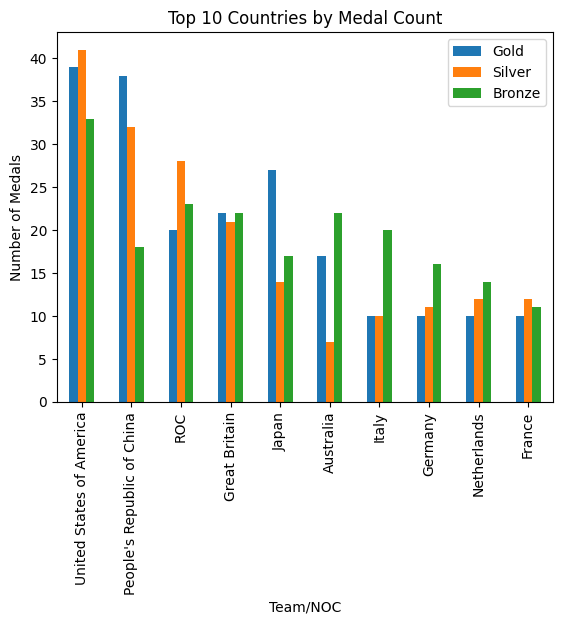

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
4,5,ROC,20,28,23,71,3
3,4,Great Britain,22,21,22,65,4
2,3,Japan,27,14,17,58,5
5,6,Australia,17,7,22,46,6
9,10,Italy,10,10,20,40,7
8,9,Germany,10,11,16,37,8
6,7,Netherlands,10,12,14,36,9
7,8,France,10,12,11,33,10


In [3]:
# What is the medal distribution by country, and which were the top 10 nations?

top_countries = df_medals.sort_values("Total", ascending=False).head(10)
top_countries.plot(x="Team/NOC", y=["Gold", "Silver", "Bronze"], kind="bar")
plt.title("Top 10 Countries by Medal Count")
plt.ylabel("Number of Medals")
plt.show()

top_countries


USA, China, and ROC dominated medal standings, with USA leading.

### Gender participation and medal trends

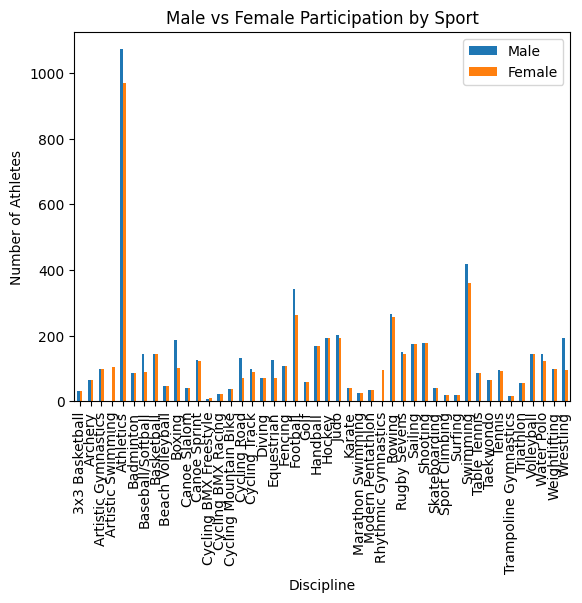

In [5]:
# How balanced was male vs female participation across sports?

df_gender.set_index("Discipline")[["Male", "Female"]].plot(kind="bar")
plt.title("Male vs Female Participation by Sport")
plt.ylabel("Number of Athletes")
plt.show()

Sports like Artistic Swimming were female-dominant, while Wrestling and Boxing were male-heavy.

### Most successful athletes or teams

In [8]:
# Among the top medal countries, who converted most medals into gold?
df_medals["Gold Efficiency"] = df_medals["Gold"] / df_medals["Total"]
best_efficiency = df_medals.sort_values("Gold Efficiency", ascending=False).reset_index().head(10)
best_efficiency[["Team/NOC", "Gold", "Total", "Gold Efficiency"]]

,Team/NOC,Gold,Total,Gold Efficiency
0,Bermuda,1,1,1.000000
1,Kosovo,2,2,1.000000
2,Puerto Rico,1,1,1.000000
3,Bahamas,2,2,1.000000
4,Morocco,1,1,1.000000
5,Ecuador,2,3,0.666667
6,Qatar,2,3,0.666667
7,Uzbekistan,3,5,0.600000
8,Slovenia,3,5,0.600000
9,Latvia,1,2,0.500000


Some smaller teams had fewer medals but a higher proportion of golds.

### Sports with the highest competition levels

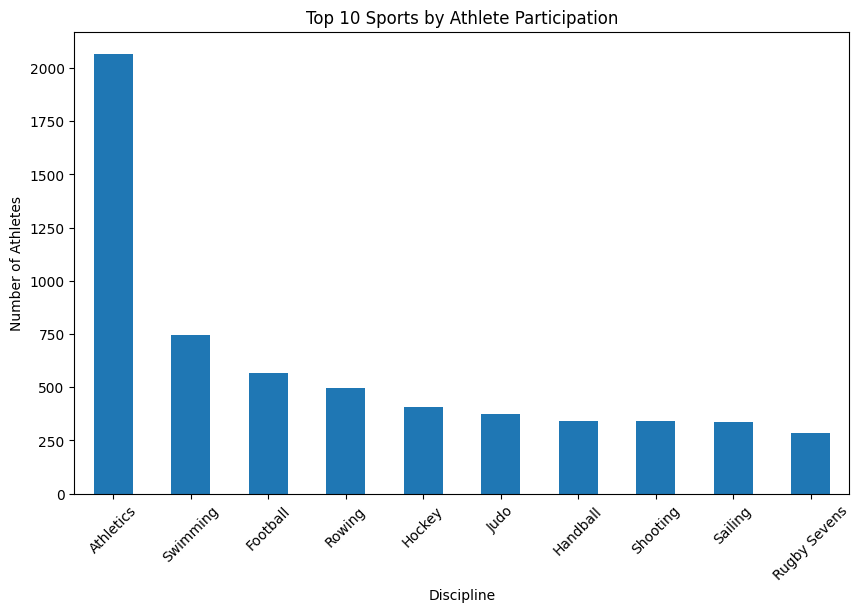

In [21]:
# Which sports had the largest athlete pools?
athlete_counts = (
    df_athletes["Discipline"]
    .value_counts()
    .reset_index()
    .head(10)
)

athlete_counts.plot(
    kind="bar",
    x="Discipline",
    y="count",
    legend=False,
    figsize=(10,6)
)

plt.title("Top 10 Sports by Athlete Participation")
plt.xlabel("Discipline")
plt.ylabel("Number of Athletes")
plt.xticks(rotation=45)
plt.show()

Athletics and Swimming had the highest competition levels.